In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
# http://www.sherrytowers.com/kalman_filter_method.pdf

mean square error is 0.6373356571751189
variance reduced to 0.001 after 4 iteration
mean square error is 0.5800632637358852
variance reduced to 0.001 after 4 iteration
mean square error is 0.6390355604139866
variance reduced to 0.001 after 4 iteration


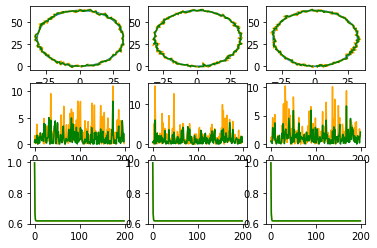

In [15]:
def dot(p, *args):
    for arg in args:
        p = np.dot(p, arg)
    return p

def F(t):
    return np.array([[1, 0, t, 0],
                     [0, 1, 0, t],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1],])

def B(t):
    t_ = (t**2)/2
    return np.array([[t_, 0],
                     [0, t_],
                     [t, 0],
                     [0, t]])

def U(ax, ay):
    return np.array([[ax],
                     [ay]])

def inverse(array):
    return np.linalg.inv(array)

true = pickle.load(open("data1/true1.pickle","rb"))
track1 = pickle.load(open("data1/position1.pickle","rb"))
track2 = pickle.load(open("data1/velocity1.pickle","rb"))
track3 = pickle.load(open("data1/acceleration1.pickle","rb"))

# for observation position
ZZ = [track1, track2, track3]
j = 1
for Z in ZZ:
    # for F and B
    t = 0
    FT = F(t).transpose()
    # for state X
    x_data = true[:,0]
    y_data = true[:,1]

    X = np.zeros((4,1))
    X_= np.zeros((4,1))

    # for variance P
    P = np.eye(4) * 500
    
    # for observation error
    R = np.eye(2)
    if t != 0: R *= t

    # for noise
    W = 0

    #processNoiseCov
    Q = np.eye(4)
    if t != 0: Q *= t
    
    # for Identity Matrix
    I = np.eye(4)
    H = np.array([[1, 0, 0, 0],[0, 1, 0, 0]])
    HT= H.transpose()

    kalmanX, kalmanY = [], []
    var_err_X, var_err_Y = [], []
    error_obv, error_kal = [], []
    
    sx = 0
    sy = 0
    for i in range(len(x_data)):
        sx += (x_data.mean() - x_data[i])**2
        sy += (y_data.mean() - y_data[i])**2
        
    x_var = sx/len(x_data)
    y_var = sy/len(y_data)
    #==================================================================
    # formula
    for i in range(len(true)):
        ax = 5#float(np.random.normal(0, 3, 1))#np.sqrt(x_var), 1))
        ay = 5#float(np.random.normal(0, 3, 1))#np.sqrt(y_var), 1))

        X_= dot(F(t), X)# + dot(B(t), U(ax, ay)) + W
        
        P_= dot(F(t), P, FT) + Q
        
        K = dot(dot(P_, HT), inverse(dot(H, P_, HT) + R))

        S = Z[i].reshape((2,1)) - dot(H, X_)

        X = X_ + dot(K, S)

        P = dot((I - dot(K, H)), P_)
        
        error_obv.append( (true[i,0]-Z[i,0])**2+(true[i,1]-Z[i,1])**2)
        error_kal.append( (true[i,0]-X[0,0])**2+(true[i,1]-X[1,0])**2)

        kalmanX.append(X[0,0])
        kalmanY.append(X[1,0])

        var_err_X.append(P[0,0])
        var_err_Y.append(P[1,1])

    plt.subplot(3,3,j)
    print(f"mean square error is {(sum(error_kal)/len(error_kal)) / (sum(error_obv)/len(error_obv))}")
    plt.plot(true[:,0],true[:,1])
    plt.plot(Z[:,0],Z[:,1],c='orange')
    plt.plot(kalmanX, kalmanY, c='g')

    plt.subplot(3,3,3+j)
    plt.plot(range(len(error_obv)), error_obv, c='orange')
    plt.plot(range(len(error_kal)), error_kal, c='g')

    plt.subplot(3,3,6+j)
    plt.plot(range(len(var_err_X)), var_err_X, c='orange')
    plt.plot(range(len(var_err_Y)), var_err_Y, c='g')
    j += 1
    
    stop = 1e-3
    first = var_err_Y[0]
    for i, v in enumerate(var_err_Y):
        if i == 0: continue
        if (first - v) < stop:
            print(f'variance reduced to {stop} after {i} iteration')
            break
        first = v
plt.show()

### Formula

In [22]:
# import pickle

# pickle_out = open("acceleration4.pickle","wb")
# pickle.dump(true, pickle_out)
# pickle_out.close()

In [21]:
# with open('tracks4.dat', 'rb') as a:
#     for i in range(30000):
#         print(str(a.readline())[2:-1]
#               .replace("\\n", ",")
#               .replace("  ", ",")
#               .replace("[,", "[")
#               .replace(",,",",")
#              )